**Importing Libraries**

In [1]:
# Pandas for dataframe and data manipulation
import pandas as pd
import numpy as np

# Matplotlib for plotting/visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For data preprocessing
from sklearn import preprocessing
label = preprocessing.LabelEncoder()    # for encoding text data

# For statistical analysis
from scipy import stats
from scipy.stats import ttest_ind

# For data scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# For clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA    # dimensionality reduction
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
# load the dataset
df_1 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Dataset/Fiverr/knn_5_imputed_dataset.xlsx")

In [3]:
pathway_pro_82 = [
    "Samples","Gender", "Age_Group", "ABCC6", "ACBD5", "AFG3L2", "AIPL1", "ALMS1", "APOD", "APOE", "ARL2BP", "ARL6", "ARMS2",
    "ARSG", "BBS10", "BBS2", "BEST1", "C2", "C3", "C8orf37", "CABP4", "CACNA1F", "CAPN5",
    "CC2D2A", "CFB", "CFD", "CFHR1", "CHM", "CLCC1", "CLN3", "CLRN1", "CLUAP1", "CNGB3",
    "CNNM4", "COX2", "CYSLT1R", "ESPN", "GRK1", "GUCY2D", "HGSNAT", "HMCN1", "IFT27", "IMPG1",
    "ITM2B", "KLHL7", "LCA5", "LRAT", "LRP5", "LTB4R", "LTE4", "LZTFL1", "MYO7A", "NDP",
    "NEK2", "NPHP1", "NR2E3", "NRL", "PCARE", "PCDH15", "PDE6B", "PDE6C", "PDZD7", "PEX7",
    "POC1B", "PRDM13", "PROM1", "PRPF4", "RB1", "RDH5", "REEP6", "RGR", "RGS9BP", "RLBP1",
    "RP1L1", "RPGR", "SAG", "SDCCAG8", "TIMP3", "TSPAN12", "TTC8", "TUBGCP4", "TUBGCP6",
    "USH2A", "VEGFA", "WDPCP"]


In [4]:
# pathways

Inflammation = ["COX2", "CFB", "CFD", "CFHR1", "TIMP3", "VEGFA", "LTB4R", "LTE4"]

Oxidative_Stress = ["APOD", "APOE", "ARSG", "HMCN1"]

Immunity = ["C2", "C3"]

Apoptosis = ["CAPN5", "TIMP3", "RB1"]

Aging = ["APOE", "ARMS2", "PRPF4", "GRK1"]

Visual_Perception = ["CNGB3", "GRK1", "GUCY2D", "PDE6B", "PDE6C", "RGS9BP", "SAG", "RGR", "RP1L1", "RPGR", "NRL", "AIPL1", "CABP4", "BEST1", "CLRN1", "RLBP1"]

Ciliopathy = ["ARL6", "BBS10", "BBS2", "CC2D2A", "CLUAP1", "IFT27", "NPHP1", "POC1B", "RPGR", "TTC8", "USH2A", "ALMS1", "ARL2BP", "CLN3", "PCARE", "PDZD7", "WDPCP", "C8orf37"]

Lipid_Metabolism = ["ABCC6", "ACBD5", "APOD", "APOE", "LRP5", "PEX7"]

Cellular_Transport = ["ACBD5", "AFG3L2", "CHM", "CLCC1", "CNNM4", "CYSLT1R", "ESPN", "HGSNAT", "LCA5", "LRAT", "LZTFL1", "MYO7A", "PDE6B", "PDE6C", "SDCCAG8", "TUBGCP4", "TUBGCP6", "ITM2B", "KLHL7", "REEP6"]

Signal_Transduction = ["NEK2", "PRDM13", "TSPAN12"]


In [5]:
# Create a new dataset with pathway specific proteins
df_pathway = df_1[pathway_pro_82]

df_lipid_metabolism = df_pathway[Lipid_Metabolism]

# Concatenate the additional columns
df_lipid_metabolism = pd.concat([df_pathway[["Samples", "Gender", "Age_Group"]], df_lipid_metabolism], axis=1)

In [6]:
df_lipid_metabolism.head() # display dataset's 1st 5 rows

,Samples,Gender,Age_Group,ABCC6,ACBD5,APOD,APOE,LRP5,PEX7
0,1_50:60_F,Female,50-60,64.6,253.0,104.2,95.6,163.2,154.0
1,2_50:60_F,Female,50-60,76.0,239.0,104.2,86.0,175.6,179.0
2,3_40:50_F,Female,40-50,55.0,257.0,117.0,97.8,165.0,155.0
3,4_40:50_F,Female,40-50,70.0,228.0,104.0,96.0,184.0,160.0
4,5_50:60_F,Female,50-60,74.2,250.8,92.0,95.2,168.0,159.0


In [7]:
print(df_lipid_metabolism.shape)   # dataset rows & columns
df_lipid_metabolism.columns        # columns of the dataset

(500, 9)


Index(['Samples', 'Gender', 'Age_Group', 'ABCC6', 'ACBD5', 'APOD', 'APOE',
       'LRP5', 'PEX7'],
      dtype='object')

In [8]:
df_lipid_metabolism.info()     # details of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Samples    500 non-null    object 
 1   Gender     500 non-null    object 
 2   Age_Group  500 non-null    object 
 3   ABCC6      500 non-null    float64
 4   ACBD5      500 non-null    float64
 5   APOD       500 non-null    float64
 6   APOE       500 non-null    float64
 7   LRP5       500 non-null    float64
 8   PEX7       500 non-null    float64
dtypes: float64(6), object(3)
memory usage: 35.3+ KB


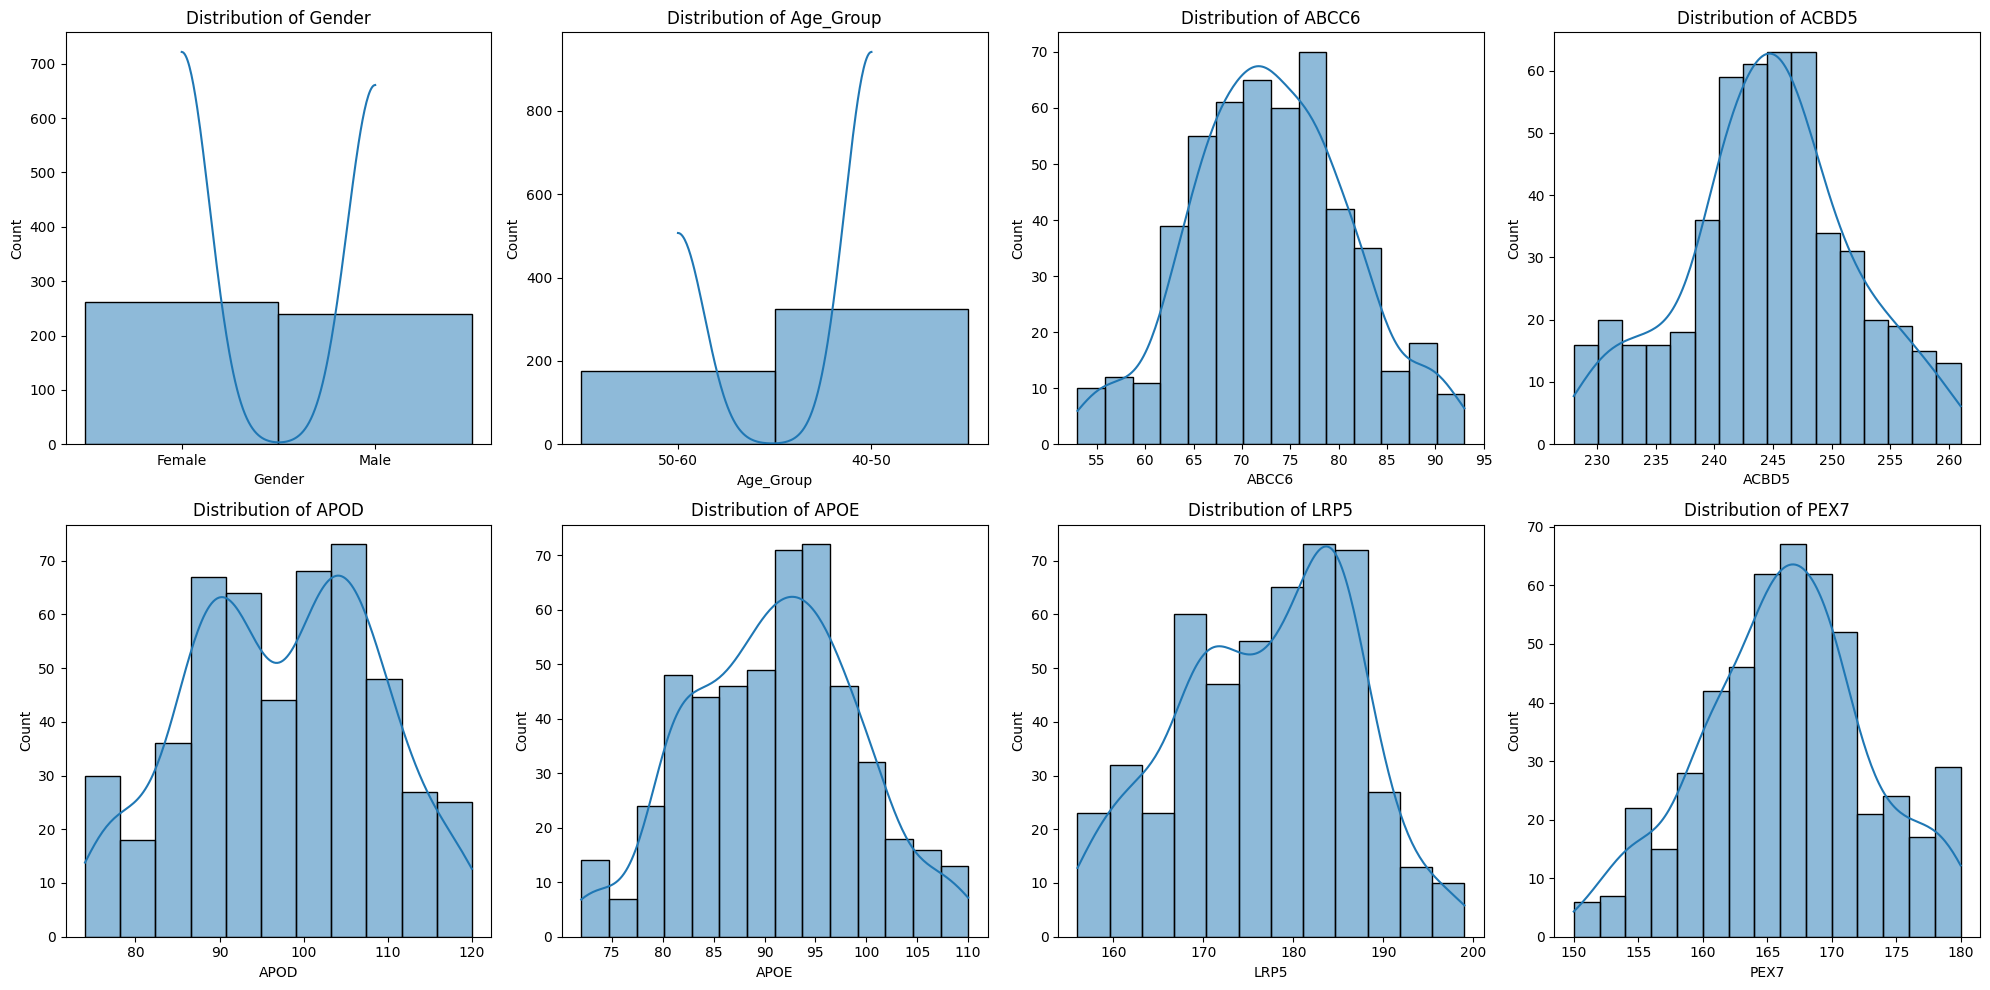

In [9]:
# Data distribution of all columns among the samples
# Number of columns to be plotted
num_columns = len(df_lipid_metabolism.columns) - 1  # Subtracting 1 to exclude the first column

# Calculate the number of rows and columns needed
num_cols = 4
num_rows = (num_columns // num_cols) + (num_columns % num_cols != 0)

# Visualize the distribution of each peptide
plt.figure(figsize=(20, num_rows * 5))  # Adjust height based on the number of rows
for i, column in enumerate(df_lipid_metabolism.columns[1:], 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df_lipid_metabolism[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

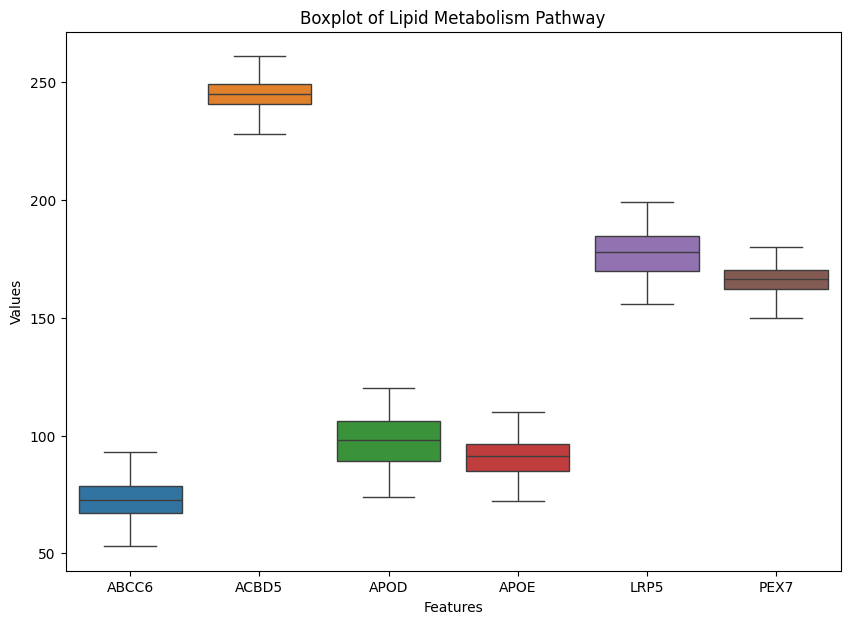

In [39]:
# Boxplot
plt.figure(figsize=(10, 7))
sns.boxplot(data=df_lipid_metabolism)

plt.title("Boxplot of Lipid Metabolism Pathway")
plt.ylabel("Values")
plt.xlabel("Features")
plt.show()


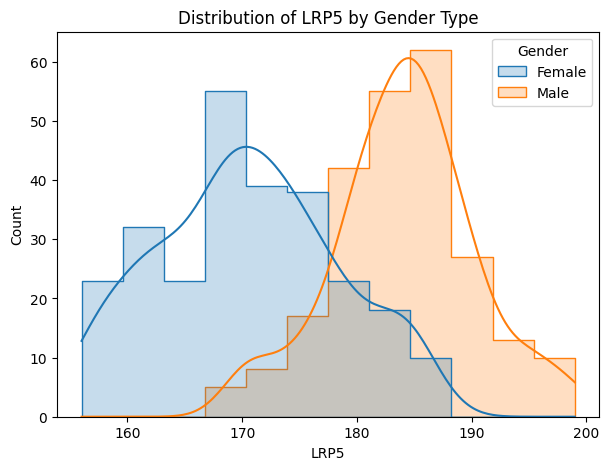

In [11]:
# Distribution plot for 'LRP5'
plt.figure(figsize=(7, 5))
sns.histplot(data=df_lipid_metabolism, x='LRP5', hue='Gender', kde=True, element="step")
plt.title('Distribution of LRP5 by Gender Type')
plt.show()

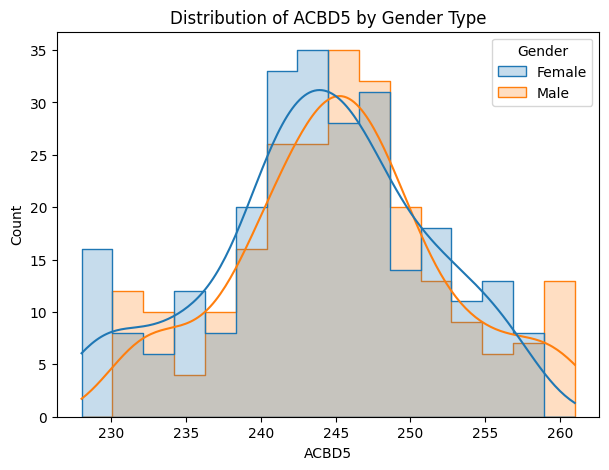

In [12]:
# Distribution plot for ACBD5
plt.figure(figsize=(7, 5))
sns.histplot(data=df_lipid_metabolism, x='ACBD5', hue='Gender', kde=True, element="step")
plt.title('Distribution of ACBD5 by Gender Type')
plt.show()

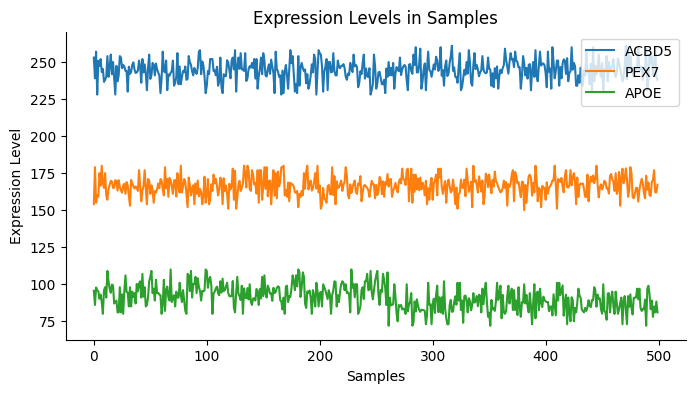

In [13]:
# Plotting proteins
df_lipid_metabolism[["ACBD5", "PEX7", "APOE"]].plot(kind='line', figsize=(8, 4), title='Expression Levels in Samples')

# Removing top and right spines for cleaner appearance
plt.gca().spines[['top', 'right']].set_visible(False)

# Adding labels to x and y axes
plt.xlabel('Samples')
plt.ylabel('Expression Level')

# Displaying the plot
plt.show()


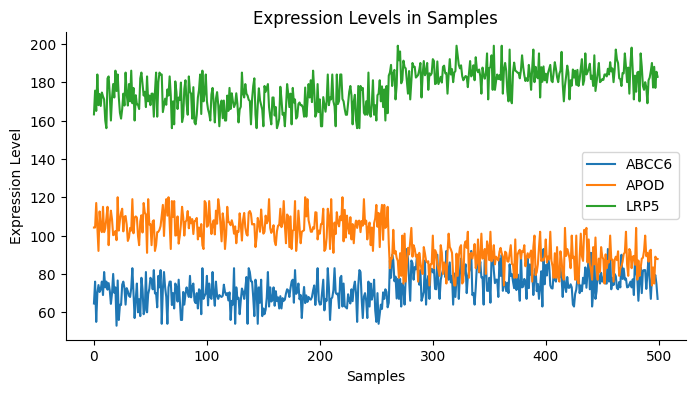

In [14]:
# Plotting proteins
df_lipid_metabolism[["ABCC6", "APOD", "LRP5"]].plot(kind='line', figsize=(8, 4), title='Expression Levels in Samples')

# Removing top and right spines for cleaner appearance
plt.gca().spines[['top', 'right']].set_visible(False)

# Adding labels to x and y axes
plt.xlabel('Samples')
plt.ylabel('Expression Level')

# Displaying the plot
plt.show()


Here, we calculated the frequency of each protein across samples, along with their average concentration (mean) and standard deviation. Additionally, we determined the standard deviation as a percentage of the mean expression, known as the coefficient of variation (CV). This provides a relative measure of the variability in expression levels.

In [15]:
# dictionary to store results for each protein
protein_stats = {}

for protein in df_lipid_metabolism.columns[3:]:
    expression_data = df_lipid_metabolism[protein]

    # Frequency (percentage of patients expressing the protein)
    frequency = round((expression_data > 0).sum() / len(expression_data) * 100, 3)

    # Spectral Counting Mean (average concentration)
    mean_expression = round(expression_data.mean(), 3)

    # Standard Deviation and Percentage (mean expression)
    std_dev = round(expression_data.std(), 3)
    std_dev_percentage_cv = round((std_dev / mean_expression) * 100, 3) if mean_expression != 0 else np.nan

    # store the results
    protein_stats[protein] = {
        'Frequency (%)': frequency,
        'Mean Expression': mean_expression,
        'Standard Deviation': std_dev,
        'CV (%)': std_dev_percentage_cv
    }

# convert to DataFrame
protein_stats_df = pd.DataFrame(protein_stats).T

In [16]:
protein_stats_df     # columns statistical analysis

,Frequency (%),Mean Expression,Standard Deviation,CV (%)
ABCC6,100.0,73.044,8.143,11.148
ACBD5,100.0,244.578,7.160,2.927
APOD,100.0,97.395,11.215,11.515
APOE,100.0,91.014,8.139,8.943
LRP5,100.0,177.017,9.805,5.539
PEX7,100.0,166.314,6.565,3.947


In [17]:
df_corr = df_lipid_metabolism.iloc[:, 3:]    # correlation among columns
df_corr.corr()

,ABCC6,ACBD5,APOD,APOE,LRP5,PEX7
ABCC6,1.000000,-0.006913,-0.399656,-0.203980,0.447338,-0.015308
ACBD5,-0.006913,1.000000,-0.056869,-0.087388,0.049175,0.008108
APOD,-0.399656,-0.056869,1.000000,0.334787,-0.566633,-0.041587
APOE,-0.203980,-0.087388,0.334787,1.000000,-0.391425,-0.168279
LRP5,0.447338,0.049175,-0.566633,-0.391425,1.000000,0.096725
PEX7,-0.015308,0.008108,-0.041587,-0.168279,0.096725,1.000000


Positive Correlations: The moderate positive correlation between ABCC6 and LRP5, as well as APOD and APOE, suggests cooperative relationships in lipid metabolism.

Negative Correlations: Strong negative correlations, such as between APOD and LRP5 or APOE and LRP5, imply opposing roles within this pathway.

Independence: ACBD5 and PEX7 show weak correlations with the other genes, suggesting that they may have more independent or less significant interactions in lipid metabolism.

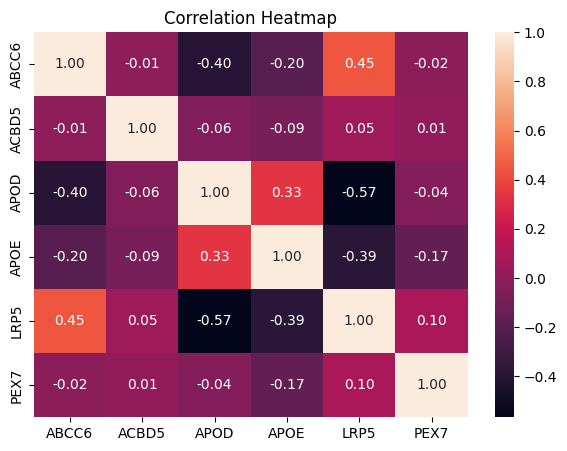

In [18]:
# Correlation Heatmap
plt.figure(figsize=(7, 5))
correlation_matrix = df_corr.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='rocket', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Performed statistical tests to identify proteins that show significant differences in expression levels between different genders (male and female) and between different age groups (40-50 and 50-60).

In [19]:
# Segregate data by gender and age group
males = df_lipid_metabolism[df_lipid_metabolism['Gender'] == 'Male']
females = df_lipid_metabolism[df_lipid_metabolism['Gender'] == 'Female']

age_40_50 = df_lipid_metabolism[df_lipid_metabolism['Age_Group'] == '40-50']
age_50_60 = df_lipid_metabolism[df_lipid_metabolism['Age_Group'] == '50-60']

# List to store significant proteins
significant_proteins_gender = []
significant_proteins_age = []

for protein in df_lipid_metabolism.columns[3:]:
    # Gender differences (t-test)
    t_stat, p_val_gender = ttest_ind(males[protein], females[protein], nan_policy='omit')
    if p_val_gender < 0.05:
        significant_proteins_gender.append(protein)

    # Age group differences (t-test)
    t_stat, p_val_age = ttest_ind(age_40_50[protein], age_50_60[protein], nan_policy='omit')
    if p_val_age < 0.05:
        significant_proteins_age.append(protein)

print("Proteins with significant differences between genders:", significant_proteins_gender)
print("Proteins with significant differences between age groups:", significant_proteins_age)


Proteins with significant differences between genders: ['ABCC6', 'ACBD5', 'APOD', 'APOE', 'LRP5']
Proteins with significant differences between age groups: []


In [20]:
print('Number of significant proteins:', len(significant_proteins_gender))
print('Number of significant proteins:', len(significant_proteins_age))

Number of significant proteins: 5
Number of significant proteins: 0


In [21]:
# Convert Gender and Age_Group columns to categorical type
df_1['Gender'] = df_1['Gender'].astype('category')
df_1['Age_Group'] = df_1['Age_Group'].astype('category')

# pathway dictionary
pathways = {
    "Inflammation": ["COX2", "CFB", "CFD", "CFHR1", "TIMP3", "VEGFA", "LTB4R", "LTE4"],
    "Oxidative_Stress": ["APOD", "APOE", "ARSG", "HMCN1"],
    "Immunity": ["C2", "C3"],
    "Apoptosis": ["CAPN5", "TIMP3", "RB1"],
    "Aging": ["APOE", "ARMS2", "PRPF4", "GRK1"],
    "Visual_Perception": ["CNGB3", "GRK1", "GUCY2D", "PDE6B", "PDE6C", "RGS9BP", "SAG", "RGR", "RP1L1", "RPGR", "NRL", "AIPL1", "CABP4", "BEST1", "CLRN1", "RLBP1"],
    "Ciliopathy": ["ARL6", "BBS10", "BBS2", "CC2D2A", "CLUAP1", "IFT27", "NPHP1", "POC1B", "RPGR", "TTC8", "USH2A", "ALMS1", "ARL2BP", "CLN3", "PCARE", "PDZD7", "WDPCP", "C8orf37"],
    "Lipid_Metabolism": ["ABCC6", "ACBD5", "APOD", "APOE", "LRP5", "PEX7"],
    "Cellular_Transport": ["ACBD5", "AFG3L2", "CHM", "CLCC1", "CNNM4", "CYSLT1R", "ESPN", "HGSNAT", "LCA5", "LRAT", "LZTFL1", "MYO7A", "PDE6B", "PDE6C", "SDCCAG8", "TUBGCP4", "TUBGCP6", "ITM2B", "KLHL7", "REEP6"],
    "Signal_Transduction": ["NEK2", "PRDM13", "TSPAN12"]
}

# Select the pathway to analyze
selected_pathway = "Lipid_Metabolism"  # Change this to analyze a different pathway

# Subset the DataFrame for the selected pathway
proteins = pathways[selected_pathway]
df_pathway_stat = df_1[proteins + ['Gender', 'Age_Group']]

# Summary statistics for the selected pathway
summary_stats = df_pathway_stat.groupby(['Gender', 'Age_Group'])[proteins].agg(['mean', 'median', 'std'])
print(f"Summary Statistics for {selected_pathway} Pathway:")
print(summary_stats)


Summary Statistics for Lipid_Metabolism Pathway:
                      ABCC6                        ACBD5                   \
                       mean median       std        mean median       std   
Gender Age_Group                                                            
Female 40-50      69.309091   69.7  7.050765  243.570455  243.8  7.459639   
       50-60      68.585882   68.6  6.429677  244.522353  245.0  6.675334   
Male   40-50      77.362416   77.4  7.206017  245.531544  245.6  7.231977   
       50-60      77.406667   77.6  7.184406  245.022222  244.6  6.726065   

                        APOD                        APOE                   \
                        mean median       std       mean median       std   
Gender Age_Group                                                            
Female 40-50      105.886364  105.8  6.977403  94.730682   94.7  6.769779   
       50-60      105.470588  105.6  6.620078  94.891765   95.4  7.966032   
Male   40-50       88.2617

<ipython-input-21-ac2751f97370>:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_stats = df_pathway_stat.groupby(['Gender', 'Age_Group'])[proteins].agg(['mean', 'median', 'std'])


In [22]:
# # Display summary statistics as a DataFrame
# summary_stats_df = pd.DataFrame(summary_stats)
# display(summary_stats_df)

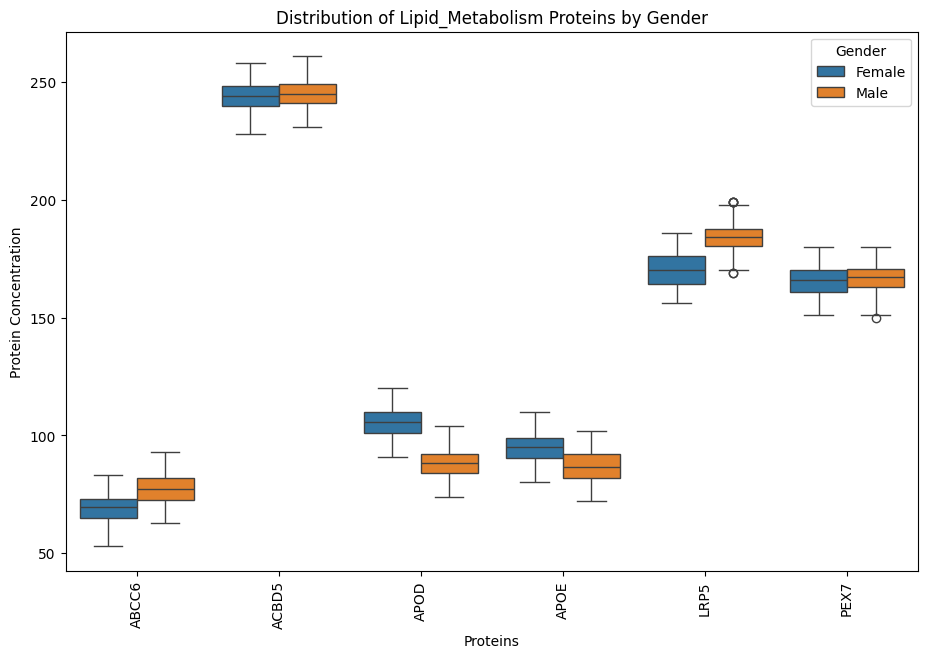

In [23]:
# Visualization: Distribution by Gender
plt.figure(figsize=(11, 7))
sns.boxplot(data=df_pathway.melt(id_vars=['Gender', 'Age_Group'], value_vars=proteins),
            x='variable', y='value', hue='Gender')
plt.title(f"Distribution of {selected_pathway} Proteins by Gender")
plt.xticks(rotation=90)
plt.ylabel("Protein Concentration")
plt.xlabel("Proteins")
plt.show()

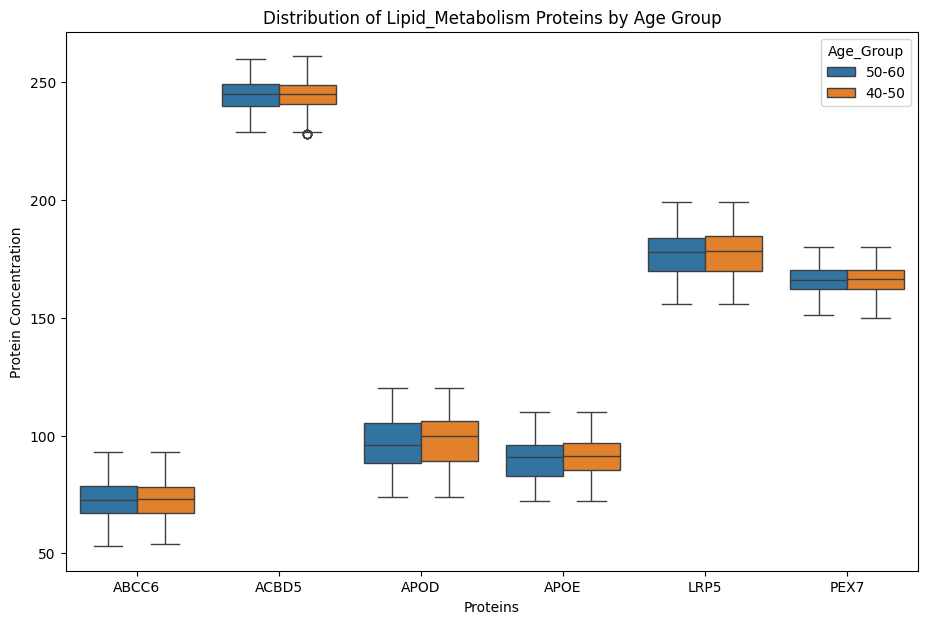

In [24]:
# Visualization: Distribution by Age Group
plt.figure(figsize=(11, 7))
sns.boxplot(data=df_pathway.melt(id_vars=['Gender', 'Age_Group'], value_vars=proteins),
            x='variable', y='value', hue='Age_Group')
plt.title(f"Distribution of {selected_pathway} Proteins by Age Group")
# plt.xticks(rotation=90)
plt.ylabel("Protein Concentration")
plt.xlabel("Proteins")
plt.show()

Here, we normalized the spectral counting data and categorized the proteins based on their expression levels.

In [25]:
p_columns = df_lipid_metabolism.columns[3:]  # protein columns

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
df_normalized = df_lipid_metabolism.copy()
df_normalized[p_columns] = scaler.fit_transform(df_lipid_metabolism[p_columns])

# Categorize proteins
def categorize_expression_level(value):
    if value >= 0.7:
        return 'Highly Expressed'
    elif value <= 0.3:
        return 'Lowly Expressed'
    else:
        return 'Moderately Expressed'

# Apply categorization to each protein column
df_categorized = df_normalized.copy()
for col in p_columns:
    df_categorized[col] = df_normalized[col].apply(categorize_expression_level)

# categorization results
summary = df_categorized[p_columns].apply(pd.Series.value_counts).fillna(0)
summary = summary.transpose()

# Display the summary
print(summary)

       Highly Expressed  Lowly Expressed  Moderately Expressed
ABCC6                78               80                   342
ACBD5                85               79                   336
APOD                120              106                   274
APOE                 89              102                   309
LRP5                 84              110                   306
PEX7                112               71                   317


In [26]:
# convert the result summary in a DataFrame
summary_df = summary.reset_index()
summary_df.columns = ['Protein', 'Highly Expressed', 'Lowly Expressed', 'Moderately Expressed']
summary_df

,Protein,Highly Expressed,Lowly Expressed,Moderately Expressed
0,ABCC6,78,80,342
1,ACBD5,85,79,336
2,APOD,120,106,274
3,APOE,89,102,309
4,LRP5,84,110,306
5,PEX7,112,71,317


In [27]:
# Function to normalize and categorize proteins
def normalize_and_categorize(df, p_columns):
    # Normalize the data using MinMaxScaler
    scaler = MinMaxScaler()
    df_normalized = df.copy()
    df_normalized[p_columns] = scaler.fit_transform(df[p_columns])

    # Apply categorization to each protein column
    df_categorized = df_normalized.copy()
    for col in p_columns:
        df_categorized[col] = df_normalized[col].apply(categorize_expression_level)

    # Summarize the categorization results
    summary = df_categorized[p_columns].apply(pd.Series.value_counts).fillna(0)
    summary = summary.transpose()

    # Convert the result summary into a DataFrame
    summary_df = summary.reset_index()
    summary_df.columns = ['Protein', 'Highly Expressed', 'Lowly Expressed', 'Moderately Expressed']
    return summary_df

# Normalize and categorize for Male
summary_male_df = normalize_and_categorize(males, p_columns)

# Normalize and categorize for Female
summary_female_df = normalize_and_categorize(females, p_columns)

# Display the results
print("Summary for Males:")
print(summary_male_df)

print("\nSummary for Females:")
print(summary_female_df)

Summary for Males:
  Protein  Highly Expressed  Lowly Expressed  Moderately Expressed
0   ABCC6                42               55                   142
1   ACBD5                39               52                   148
2    APOD                33               57                   149
3    APOE                49               39                   151
4    LRP5                41               30                   168
5    PEX7                60               32                   147

Summary for Females:
  Protein  Highly Expressed  Lowly Expressed  Moderately Expressed
0   ABCC6                60               40                   161
1   ACBD5                64               45                   152
2    APOD                55               45                   161
3    APOE                51               49                   161
4    LRP5                59               70                   132
5    PEX7                46               42                   173


In [28]:
# Normalize and categorize for Age 40-50
summary_age_40_50_df = normalize_and_categorize(age_40_50, p_columns)

# Normalize and categorize for Age 50-60
summary_age_50_60_df = normalize_and_categorize(age_50_60, p_columns)

# Display the results
print("Summary for Age 40-50:")
print(summary_age_40_50_df)

print("\nSummary for Age 50-60:")
print(summary_age_50_60_df)

Summary for Age 40-50:
  Protein  Highly Expressed  Lowly Expressed  Moderately Expressed
0   ABCC6                48               50                   227
1   ACBD5                53               58                   214
2    APOD                82               65                   178
3    APOE                62               57                   206
4    LRP5                52               71                   202
5    PEX7                73               45                   207

Summary for Age 50-60:
  Protein  Highly Expressed  Lowly Expressed  Moderately Expressed
0   ABCC6                30               33                   112
1   ACBD5                38               26                   111
2    APOD                38               41                    96
3    APOE                27               45                   103
4    LRP5                32               39                   104
5    PEX7                36               27                   112


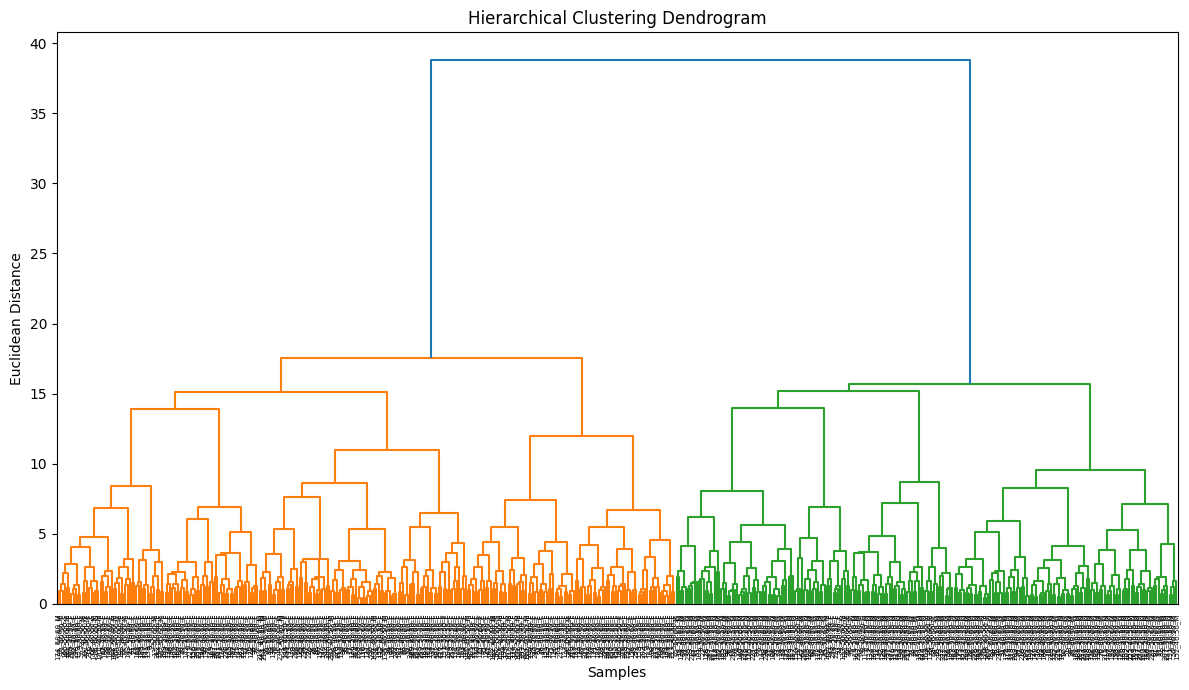

In [29]:
# Select only the protein columns for clustering
protein_columns = ["ABCC6", "ACBD5", "APOD", "APOE", "LRP5", "PEX7"]
df_proteins = df_lipid_metabolism[protein_columns]

# Standardize the data
ss_scaler = StandardScaler()
df_proteins_scaled = ss_scaler.fit_transform(df_proteins)

# Perform hierarchical clustering
linkage_matrix = linkage(df_proteins_scaled, method='ward')

# Create a dendrogram
plt.figure(figsize=(12, 7))
dendrogram(linkage_matrix, labels=df_lipid_metabolism['Samples'].values, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [30]:
from scipy.cluster.hierarchy import fcluster

num_clusters = 2  # Adjust this number as needed
cluster_labels = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Create a DataFrame to easily view the sample names with their corresponding clusters
df_clusters_d = pd.DataFrame({
    'Sample': df_lipid_metabolism['Samples'],
    'Cluster': cluster_labels
})

# Group the samples by their cluster
clusters = df_clusters_d.groupby('Cluster')['Sample'].apply(list).to_dict()

# Print each cluster as a list
for cluster_id, samples in clusters.items():
    print(f"Cluster {cluster_id}: {samples}\n")

Cluster 1: ['32_40:50_F', '33_50:60_F', '43_40:50_F', '48_50:60_F', '74_40:50_F', '94_40:50_F', '95_40:50_F', '97_40:50_F', '127_40:50_F', '147_40:50_F', '227_40:50_F', '238_50:60_F', '248_40:50_F', '1_50:60_M', '2_40:50_M', '3_40:50_M', '4_40:50_M', '5_50:60_M', '6_40:50_M', '8_40:50_M', '9_50:60_M', '10_40:50_M', '11_40:50_M', '12_40:50_M', '14_40:50_M', '16_40:50_M', '17_40:50_M', '18_50:60_M', '19_40:50_M', '22_40:50_M', '23_40:50_M', '24_50:60_M', '25_40:50_M', '26_40:50_M', '27_50:60_M', '28_40:50_M', '29_40:50_M', '30_50:60_M', '31_40:50_M', '32_40:50_M', '33_50:60_M', '34_40:50_M', '35_50:60_M', '36_40:50_M', '37_40:50_M', '38_50:60_M', '39_40:50_M', '40_40:50_M', '41_50:60_M', '42_40:50_M', '44_40:50_M', '45_40:50_M', '46_50:60_M', '47_50:60_M', '48_40:50_M', '49_50:60_M', '50_40:50_M', '51_40:50_M', '52_50:60_M', '53_40:50_M', '55_50:60_M', '56_40:50_M', '57_40:50_M', '58_50:60_M', '59_40:50_M', '60_40:50_M', '61_50:60_M', '62_40:50_M', '63_50:60_M', '64_40:50_M', '65_50:60_M

In [31]:
cluster_counts = df_clusters_d['Cluster'].value_counts()
cluster_counts

,count
Cluster,
2,276
1,224


Performed clustering to identify natural groupings or patterns in our data. We used K-means algorithm and Elbow method to determine the optimal number of clusters by plotting the Within-Cluster Sum of Square (WCSS) against different numbers of clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

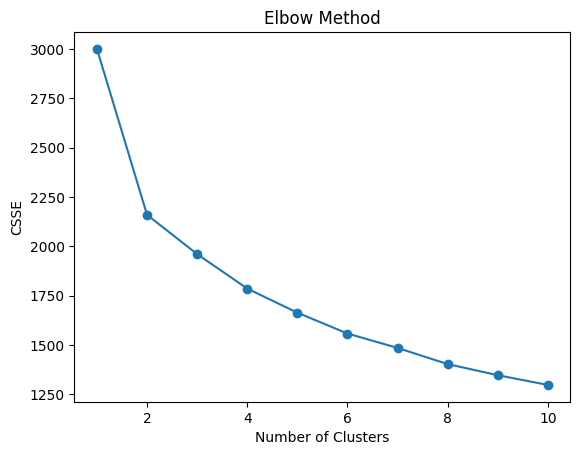

In [32]:
pro_columns = df_lipid_metabolism.columns[3:]

# Data Standardization/Normalization
s_scaler = StandardScaler()
# m_scaler = MinMaxScaler()
X = s_scaler.fit_transform(df_lipid_metabolism[pro_columns])

k_rang = range(1, 11)
csse = []

for k in k_rang:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    csse.append(kmeans.inertia_)    # sum of square error

# Plotting the Elbow Curve
plt.plot(k_rang, csse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('CSSE')
plt.show()

In [33]:
csse

[2999.9999999999986,
 2159.403088400112,
 1960.6212823871442,
 1785.9075198084495,
 1663.9522640810708,
 1558.2447566869591,
 1485.3535035242915,
 1403.4715771938959,
 1347.208259418955,
 1297.939497492899]

In [34]:
# K-means Clustering (optimal k based on the Elbow plot)
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
clusters = kmeans.fit_predict(X)
print(clusters)

# Add cluster labels to the DataFrame
df_cluster = df_lipid_metabolism.copy()
df_cluster['Cluster'] = clusters

# print the DataFrame
df_cluster

[0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0
 1 1 1 1 1 1 1 1 1 0 1 1 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Samples,Gender,Age_Group,ABCC6,ACBD5,APOD,APOE,LRP5,PEX7,Cluster
0,1_50:60_F,Female,50-60,64.6,253.0,104.2,95.6,163.2,154.0,0
1,2_50:60_F,Female,50-60,76.0,239.0,104.2,86.0,175.6,179.0,1
2,3_40:50_F,Female,40-50,55.0,257.0,117.0,97.8,165.0,155.0,0
3,4_40:50_F,Female,40-50,70.0,228.0,104.0,96.0,184.0,160.0,0
4,5_50:60_F,Female,50-60,74.2,250.8,92.0,95.2,168.0,159.0,0
...,...,...,...,...,...,...,...,...,...,...
495,235_50:60_M,Male,50-60,79.6,241.0,83.4,78.0,177.2,170.4,1
496,236_40:50_M,Male,40-50,78.0,247.4,75.0,85.0,188.0,177.0,1
497,237_50:60_M,Male,50-60,79.4,260.0,89.0,81.0,177.0,162.0,1
498,238_40:50_M,Male,40-50,74.6,240.0,88.0,88.4,185.4,162.0,1


In [35]:
# Group the DataFrame by the 'Cluster' column
clustered_samples = df_cluster.groupby('Cluster')['Samples'].apply(list)

# Print the sample names for each cluster
for cluster, samples in clustered_samples.items():
    print(f"Cluster {cluster}:")
    print(samples)
    print("\n")


Cluster 0:
['1_50:60_F', '3_40:50_F', '4_40:50_F', '5_50:60_F', '6_50:60_F', '7_40:50_F', '9_50:60_F', '10_40:50_F', '11_40:50_F', '12_40:50_F', '13_50:60_F', '15_40:50_F', '16_40:50_F', '17_40:50_F', '18_40:50_F', '19_50:60_F', '21_50:60_F', '22_40:50_F', '23_40:50_F', '24_40:50_F', '25_50:60_F', '26_40:50_F', '28_40:50_F', '29_50:60_F', '30_40:50_F', '31_40:50_F', '33_50:60_F', '35_40:50_F', '36_50:60_F', '37_40:50_F', '38_40:50_F', '39_50:60_F', '40_40:50_F', '41_40:50_F', '42_40:50_F', '43_40:50_F', '44_50:60_F', '45_40:50_F', '46_40:50_F', '47_40:50_F', '49_40:50_F', '50_40:50_F', '51_40:50_F', '52_40:50_F', '53_50:60_F', '54_40:50_F', '56_50:60_F', '57_40:50_F', '61_40:50_F', '62_40:50_F', '63_40:50_F', '64_40:50_F', '65_40:50_F', '66_40:50_F', '67_40:50_F', '69_50:60_F', '70_40:50_F', '71_50:60_F', '72_40:50_F', '74_40:50_F', '75_40:50_F', '76_50:60_F', '77_40:50_F', '78_40:50_F', '79_50:60_F', '80_40:50_F', '81_40:50_F', '83_50:60_F', '84_40:50_F', '85_40:50_F', '86_40:50_F', '

In [36]:
# kmeans.cluster_centers_

df_cluster.value_counts('Cluster')

,count
Cluster,
1,259
0,241


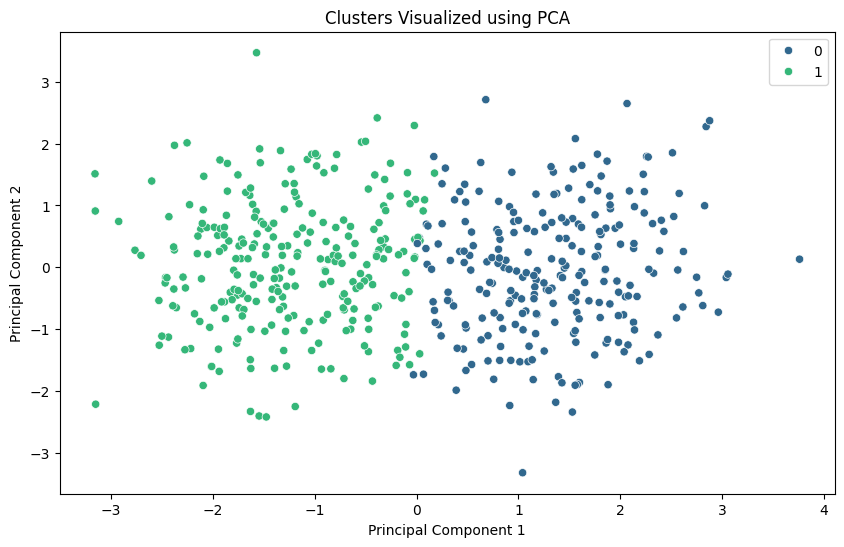

In [37]:
# Visualize the Clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis')
plt.title('Clusters Visualized using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

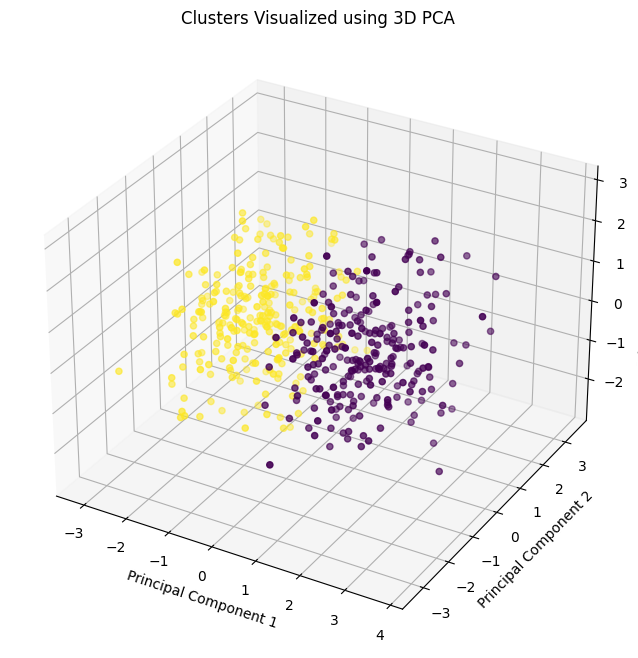

In [38]:
from mpl_toolkits.mplot3d import Axes3D

# Perform PCA with 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# 3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=clusters, cmap='viridis')
ax.set_title('Clusters Visualized using 3D PCA')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()
